<a href="https://colab.research.google.com/github/aliwagdy2580/NLP/blob/main/Recommender%20Systems%20with%20DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 1: Introduction to Recommendation Engines

## Basic imports

In [ ]:
# Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

from pathlib import Path
import os
import re
import html
import string

import unicodedata


import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer


from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import regularizers
from tensorflow.keras import metrics
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# Lesson 1: What are recommendation engines?

## Learning Objectives

- Learner will be able to be able to define what recommender systems are
- Learner will be able to be able to list the different approaches to recommender systems
- Learner will be able to identify different applications of recommender systems

# Lesson 2: Simple Recommender system


## Learning Objectives

- Learner will be able to build simple recommender with sklearn based on movie popularity/votes based on IMDB dataset.
- Learner will be able to decide a metric for items to recommend based on that.
- Learner will be able to calculate a score for every item/movie.
- Learner will be able to sort items/movies based on their scores.


##  Preparation code
Not part of the excercise answer

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Download data from [kaggle](https://www.kaggle.com/rounakbanik/the-movies-dataset/download), or this [link](https://drive.google.com/drive/folders/1JnQXDCsGAb75I4PRRMDHUO0WxmXT-usv?usp=sharing)

In [ ]:
# Load Movies Metadata
imdb_data_dir = '/content/drive/My Drive/Colab Notebooks/Recommendation/DataCamp/imdb/'

In [ ]:

metadata = pd.read_csv(imdb_data_dir + 'movies_metadata.csv')

# Print the first three rows
metadata.head(3)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [ ]:
len(metadata)

45466

In [ ]:
# data columns
print(metadata.columns)

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


In [ ]:
# calculate C
C = metadata['vote_average'].mean()
print(C)

5.618207215133889


In [ ]:
# Calculate M
M = metadata['vote_count'].quantile(0.90)
print(M)
print(metadata.shape)

160.0
(45466, 24)


In [ ]:
# Filter out all qualified movies into a new DataFrame
q_movies = metadata.copy().loc[metadata['vote_count'] >= M]
q_movies.shape

(4555, 24)

In [ ]:
# Function that computes the weighted rating of each movie
def weighted_rating(x, M=M, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+M) * R) + (M/(M+v) * C)


In [ ]:
print(q_movies.columns)

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


In [ ]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [ ]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(15)

,title,vote_count,vote_average,score
314,The Shawshank Redemption,8358.0,8.5,8.445869
834,The Godfather,6024.0,8.5,8.425439
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.421453
12481,The Dark Knight,12269.0,8.3,8.265477
2843,Fight Club,9678.0,8.3,8.256385
292,Pulp Fiction,8670.0,8.3,8.251406
522,Schindler's List,4436.0,8.3,8.206639
23673,Whiplash,4376.0,8.3,8.205404
5481,Spirited Away,3968.0,8.3,8.196055
2211,Life Is Beautiful,3643.0,8.3,8.187171


Build score function

In [ ]:
# Function that computes the weighted rating of each movie
C = metadata['vote_average'].mean()
M = metadata['vote_count'].quantile(0.90)

def weighted_rating(x, M=M, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+M) * R) + (M/(M+v) * C)





Use the recommendation score to recommend the top 15 movies

In [ ]:
# Filter out all qualified movies into a new DataFrame
q_movies = metadata.copy().loc[metadata['vote_count'] >= M]
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(15)

,title,vote_count,vote_average,score
314,The Shawshank Redemption,8358.0,8.5,8.445869
834,The Godfather,6024.0,8.5,8.425439
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.421453
12481,The Dark Knight,12269.0,8.3,8.265477
2843,Fight Club,9678.0,8.3,8.256385
292,Pulp Fiction,8670.0,8.3,8.251406
522,Schindler's List,4436.0,8.3,8.206639
23673,Whiplash,4376.0,8.3,8.205404
5481,Spirited Away,3968.0,8.3,8.196055
2211,Life Is Beautiful,3643.0,8.3,8.187171


# Lesson 3: Content based recommender systems

## Learning Objectives

- Learner will be able to understand and calculate the TF-IDF using sklearn for text sentence (item/movie overview).
- Learner will be able to understand what is meant by Dot product, and relation to Cosine similarity.
- Learner will be able to calculate cosine similarity with sklearn for two TF-IDF vectors.
- Learner will be able to recommend movies based on their cosine similarity to other movies overview text description.
- Learner will be able to use CountVectorizer in sklearn to recommend movies based on other meta-data, like credits, genres and keywords.

## Preparation code

In [ ]:
#Print plot overviews of the first 5 movies.
metadata['overview'].head()

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object


Calculate the TF-IDF transform for the movies overview texts

In [ ]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
metadata['overview'] = metadata['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(metadata['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(45466, 75827)


Compute the pair-wise cosine similarity between all overviews of movies. 


Remember: since that:

$$x.y = ||x||.||y||.cos(\theta)$$

So 
$$cos(\theta) = \frac{x.y}{||x||||y||}$$

So we can use the `linear_kernel` from sklearn, which is faster than `cosine_similarity`

In [ ]:
# Compute the cosine Similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


Implement the function `get_recommendations` that produces 10 most similar movies, based on cosine_similarity between the TF-IDF scores of descriptions

In [ ]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(metadata.index, index=metadata['title']).drop_duplicates()

In [ ]:

# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return metadata['title'].iloc[movie_indices]

In [ ]:
print(get_recommendations('The Dark Knight Rises'))

12481                                      The Dark Knight
150                                         Batman Forever
1328                                        Batman Returns
15511                           Batman: Under the Red Hood
585                                                 Batman
21194    Batman Unmasked: The Psychology of the Dark Kn...
9230                    Batman Beyond: Return of the Joker
18035                                     Batman: Year One
19792              Batman: The Dark Knight Returns, Part 1
3095                          Batman: Mask of the Phantasm
Name: title, dtype: object


In [ ]:
get_recommendations('The Godfather')

1178               The Godfather: Part II
44030    The Godfather Trilogy: 1972-1990
1914              The Godfather: Part III
23126                          Blood Ties
11297                    Household Saints
34717                   Start Liquidation
10821                            Election
38030            A Mother Should Be Loved
17729                   Short Sharp Shock
26293                  Beck 28 - Familjen
Name: title, dtype: object


 we want to recommend movies based on some extra metadata _features_, like `'cast', 'crew', 'keywords', 'genres'`. One important difference is that you use the `CountVectorizer()` instead of TF-IDF. This is because you do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies. It doesn't make much intuitive sense.

You are asked to recommend movies on the new cosine_similarity, pair wise `CountVectorizer()` scores.

##  Preparation code


In [ ]:
# Load keywords and credits
credits = pd.read_csv(imdb_data_dir + 'credits.csv')
keywords = pd.read_csv(imdb_data_dir + 'keywords.csv')

# Remove rows with bad IDs.
metadata = metadata.drop([19730, 29503, 35587])

# Convert IDs to int. Required for merging
keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')
metadata['id'] = metadata['id'].astype('int')

# Merge keywords and credits into your main metadata dataframe
metadata = metadata.merge(credits, on='id')
metadata = metadata.merge(keywords, on='id')

In [ ]:
# Print the first two movies of your newly merged metadata
metadata.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."


In [ ]:
len(metadata)

46628

In [ ]:
# Limit the data for memory size
metadata = metadata[:10000]

In [ ]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    metadata[feature] = metadata[feature].apply(literal_eval)

In [ ]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [ ]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [ ]:
# Define new director, cast, genres and keywords features that are in a suitable form.
metadata['director'] = metadata['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    metadata[feature] = metadata[feature].apply(get_list)

In [ ]:
# Print the new features of the first 3 films
metadata[['title', 'cast', 'director', 'keywords', 'genres']].head(10)

,title,cast,director,keywords,genres
0,Toy Story,"[tomhanks, timallen, donrickles]",johnlasseter,"[jealousy, toy, boy]","[animation, comedy, family]"
1,Jumanji,"[robinwilliams, jonathanhyde, kirstendunst]",joejohnston,"[boardgame, disappearance, basedonchildren'sbook]","[adventure, fantasy, family]"
2,Grumpier Old Men,"[waltermatthau, jacklemmon, ann-margret]",howarddeutch,"[fishing, bestfriend, duringcreditsstinger]","[romance, comedy]"
3,Waiting to Exhale,"[whitneyhouston, angelabassett, lorettadevine]",forestwhitaker,"[basedonnovel, interracialrelationship, single...","[comedy, drama, romance]"
4,Father of the Bride Part II,"[stevemartin, dianekeaton, martinshort]",charlesshyer,"[baby, midlifecrisis, confidence]",[comedy]
5,Heat,"[alpacino, robertdeniro, valkilmer]",michaelmann,"[robbery, detective, bank]","[action, crime, drama]"
6,Sabrina,"[harrisonford, juliaormond, gregkinnear]",sydneypollack,"[paris, brotherbrotherrelationship, chauffeur]","[comedy, romance]"
7,Tom and Huck,"[jonathantaylorthomas, bradrenfro, rachaelleig...",peterhewitt,[],"[action, adventure, drama]"
8,Sudden Death,"[jean-claudevandamme, powersboothe, dorianhare...",peterhyams,"[terrorist, hostage, explosive]","[action, adventure, thriller]"
9,GoldenEye,"[piercebrosnan, seanbean, izabellascorupco]",martincampbell,"[cuba, falselyaccused, secretidentity]","[adventure, action, thriller]"


In [ ]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [ ]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    metadata[feature] = metadata[feature].apply(clean_data)

In [ ]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

In [ ]:
# Create a new soup feature
metadata['soup'] = metadata.apply(create_soup, axis=1)

In [ ]:


count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(metadata['soup'])
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
# Reset index of your main DataFrame and construct reverse mapping as before
metadata = metadata.reset_index()
indices = pd.Series(metadata.index, index=metadata['title'])

Implement the function `get_recommendations` that produces 10 most similar movies, using the Counts based pair-wise cosine similarity to give recommendations based on meta data.

In [ ]:

# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim2):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return metadata['title'].iloc[movie_indices]

In [ ]:
get_recommendations('The Godfather', cosine_sim2)

1934           The Godfather: Part III
1199            The Godfather: Part II
8001    The Night of the Following Day
7772                          Mitchell
1186                    Apocalypse Now
1648                  Ill Gotten Gains
3487        Jails, Hospitals & Hip-Hop
4012                  Gardens of Stone
5309                       The Gambler
5                                 Heat
Name: title, dtype: object

# Chapter 3: Collaborative filtering


## Lesson 1: What are collaborative filters?

## Learning Objectives
- Learner will be able to identify the difference between the collaborative filtering approach and content based approach.
- Learner will be able to capture the overall model architecture using the ML workflow.
- Learner will be able to describe the learning process and the involved loss optimization using neural networks to build a colaborative filter.

Describe collaborative filtering and its relation to SVD and Matrix factorization

# Lesson 2: The use of dot products to measure similarity
- Learner will be able to apply dot products to measure vectors similarity
- Learner will be able to use sklearn to measure different similarity metrics, like cosine similarity
- Learner will be able to build models with Keras involving Dot product

Find the simialrity score between the following group of vectors using dot product in sklearn

In [ ]:
X = np.array([[2, 3], [3, 5], [5, 8]])
Y = np.array([[1, 0], [2, 1]])

In [ ]:
pairwise_kernels(X, Y, metric='linear')

array([[ 2.,  7.],
       [ 3., 11.],
       [ 5., 18.]])

## Excercise

Find the simialrity score between the following group of vectors using cosine similarity in sklearn

In [ ]:
X = np.array([[2, 3], [3, 5], [5, 8]])
Y = np.array([[1, 0], [2, 1]])

## Answer

In [ ]:
cosine_similarity(X, Y)

array([[0.5547002 , 0.86824314],
       [0.51449576, 0.84366149],
       [0.52999894, 0.85328183]])

Build keras `Model` that applies Dot operation on two inputs of size (10000,)

## Answer

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 10000)]      0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 10000)]      0                                            
__________________________________________________________________________________________________
dot (Dot)                       (None, 1)            0           input_7[0][0]                    
                                                                 input_8[0][0]                    
Total params: 0
Trainable params: 0
Non-trainable params: 0
__________________________________________________________________________________________________


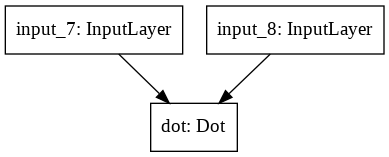

In [ ]:
inp_1 = layers.Input(shape=(10000,))
inp_2 = layers.Input(shape=(10000,))
out = layers.Dot(axes=1)([inp_1, inp_2])
model = models.Model(inputs=[inp_1, inp_2], outputs=out)
model.summary()
plot_model(model)

# Lesson 3: The use of categorical Embeddings to encode Latent factors and Meta data

## Learning Objectives
- Learner will be able to use categorical variables as inputs to keras models
- Learner will be able to encode different meta data from MovieLens dataset as inputs to Keras model

## Excercise

Use the Embedding layer to build the following model
- inp_1 = categorical/scalar value, range = 1000 values
- inp_2 = categorical/scalar value, range = 2000 values
- out = 100 dimensions

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_12 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_9 (Embedding)         (None, 1, 100)       100000      input_11[0][0]                   
__________________________________________________________________________________________________
embedding_10 (Embedding)        (None, 1, 100)       200000      input_12[0][0]                   
____________________________________________________________________________________________

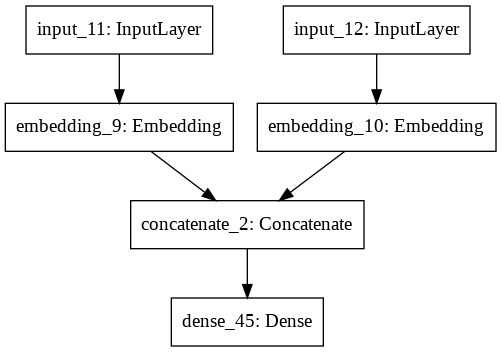

In [ ]:
# Number of latent factors
emb_sz = 100

# User embeddings
inp_1 = layers.Input(shape=(1,))
emb_1 = layers.Embedding(1000, emb_sz)(inp_1)

# Movie embeddings
inp_2 = layers.Input(shape=(1,))
emb_2 = layers.Embedding(2000, emb_sz)(inp_2)

emb = layers.concatenate([emb_1, emb_2])
out = layers.Dense(100)(emb)

model = models.Model(inputs=[inp_1, inp_2], outputs=out)
print(model.summary())
plot_model(model)

# Lesson 4: Putting it all togehter! 

## Learning Objectives
- Learner will be able to extract the user/movie rating matrix from MovieLens dataset using pandas
- Learner will be able to prepare the categorical variables of meta data for MovieLens dataset
- Learner will be able to build a collaborative filter for MovieLens dataset


## Excercise

Extract the user/movie rating matrix from MovieLens dataset using pandas, for the top 15 movies and users.

## Preparation
Not part of the answer

In [ ]:
!wget http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

--2020-05-10 14:05:47--  http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K   972KB/s    in 1.0s    

2020-05-10 14:05:48 (972 KB/s) - ‘ml-latest-small.zip’ saved [978202/978202]



In [ ]:
!unzip ml-latest-small.zip

Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [ ]:
movies = pd.read_csv('ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
pd.crosstab(ratings.userId, ratings.movieId).head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Answer

In [ ]:
k = 15
g = ratings.groupby('userId')['rating'].count()
top_users = g.sort_values(ascending=False)[:k]

g = ratings.groupby('movieId')['rating'].count()
top_movies = g.sort_values(ascending=False)[:k]

top_r = ratings.join(top_users, rsuffix='_r', how='inner', on='userId')
top_r = top_r.join(top_movies, rsuffix='_r', how='inner', on='movieId')

pd.crosstab(top_r.userId, top_r.movieId, top_r.rating, aggfunc=np.sum)

movieId,1,50,110,260,296,318,356,480,527,589,593,1196,2571,2858,2959
userId,,,,,,,,,,,,,,,
68,2.5,3.0,2.5,5.0,2.0,3.0,3.5,3.5,4.0,3.5,3.5,5.0,4.5,5.0,2.5
182,4.0,4.5,3.5,3.5,5.0,4.5,5.0,3.5,4.0,2.0,4.5,3.0,5.0,5.0,5.0
249,4.0,4.0,5.0,5.0,4.0,4.5,4.5,4.0,4.5,4.0,4.0,5.0,5.0,4.5,5.0
274,4.0,4.0,4.5,3.0,5.0,4.5,4.5,3.5,4.0,4.5,4.0,4.5,4.0,5.0,5.0
288,4.5,NaN,5.0,5.0,5.0,5.0,5.0,2.0,5.0,4.0,5.0,4.5,3.0,NaN,3.5
307,4.0,4.5,3.5,3.5,4.5,4.5,4.0,3.5,4.5,2.5,4.5,3.0,3.5,4.0,4.0
380,5.0,4.0,4.0,5.0,5.0,3.0,5.0,5.0,NaN,5.0,5.0,5.0,4.5,NaN,4.0
387,NaN,4.5,3.5,4.5,5.0,3.5,4.0,3.0,NaN,3.5,4.0,4.5,4.0,4.5,4.5
414,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0


## Excercise

Encode the user id, and movie id categorical variables, using sklean LabelEncoder to be used with the Embedding layer.

## Answer

In [ ]:
user_enc = LabelEncoder()
ratings['user'] = user_enc.fit_transform(ratings.userId.values)
n_users = ratings['user'].nunique()

item_enc = LabelEncoder()
ratings['movie'] = user_enc.fit_transform(ratings.movieId.values)
n_movies = ratings['movie'].nunique()

ratings['rating'] = ratings['rating'].values.astype(np.float32)
min_rating = min(ratings['rating'])
max_rating = max(ratings['rating'])

n_users, n_movies, min_rating, max_rating

(610, 9724, 0.5, 5.0)

## Excercise

Build the collaborative filtering model, using keras Embedding and Dot layers

## Answer

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_id (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
movie_id (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
user_embedding_LUT (Embedding)  (None, 1, 50)        30500       user_id[0][0]                    
__________________________________________________________________________________________________
movie_embedding_LUT (Embedding) (None, 1, 50)        486200      movie_id[0][0]                   
____________________________________________________________________________________________

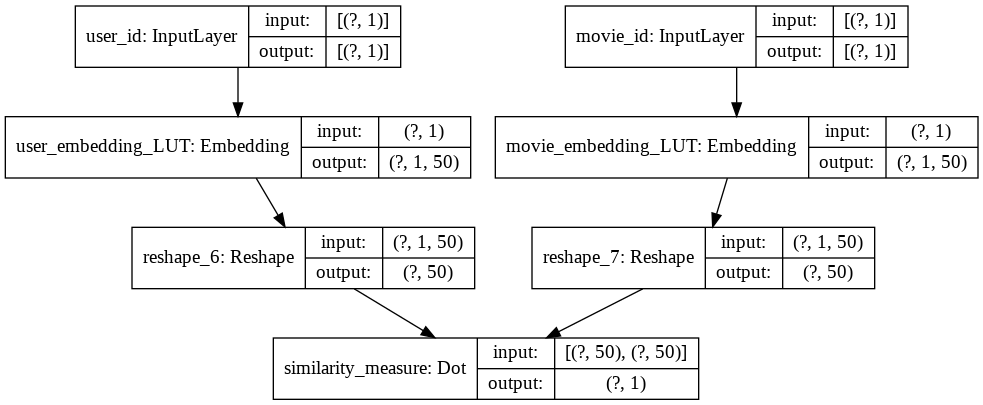

In [ ]:
# Number of latent factors
emb_sz = 50

# User embeddings
user = layers.Input(shape=(1,), name='user_id')
user_emb = layers.Embedding(n_users, emb_sz, embeddings_regularizer=regularizers.l2(1e-6), name='user_embedding_LUT')(user) #to create embedding matrix 
user_emb = layers.Reshape((emb_sz,))(user_emb)

# Movie embeddings
movie = layers.Input(shape=(1,), name='movie_id')
movie_emb = layers.Embedding(n_movies, emb_sz, embeddings_regularizer=regularizers.l2(1e-6), name='movie_embedding_LUT')(movie)
movie_emb = layers.Reshape((emb_sz,))(movie_emb)

# Dot product
rating = layers.Dot(axes=1, name='similarity_measure')([user_emb, movie_emb])


# Model
model = models.Model([user, movie], rating)

# Compile the model
model.compile(loss='mse',  metrics=metrics.RootMeanSquaredError(),
              optimizer=optimizers.Adam(lr=0.001))

# Show model summary
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

## Excercise
Extract the train and test data for MovieLens

In [ ]:
X = ratings[['user', 'movie']].values
y = ratings['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(90752, 2) (90752,)
(10084, 2) (10084,)


## Excercise
Compile and train the model on MovieLens dataset

## Answer

In [ ]:
# Compile the model
model.compile(loss='mse',  metrics=metrics.RootMeanSquaredError(),
              optimizer=optimizers.Adam(lr=0.001))
model.fit(x=[X_train[:,0], X_train[:,1]], y=y_train,
          batch_size=64, epochs=5, verbose=1,
          validation_data=([X_test[:,0], X_test[:,1]], y_test))

Epoch 1/5


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


1418/1418 [==============================] - 5s 4ms/step - loss: 9.3721 - root_mean_squared_error: 3.0611 - val_loss: 3.2083 - val_root_mean_squared_error: 1.7907
Epoch 2/5
1418/1418 [==============================] - 5s 3ms/step - loss: 1.9927 - root_mean_squared_error: 1.4088 - val_loss: 1.6493 - val_root_mean_squared_error: 1.2814
Epoch 3/5
1418/1418 [==============================] - 5s 3ms/step - loss: 1.1534 - root_mean_squared_error: 1.0687 - val_loss: 1.3665 - val_root_mean_squared_error: 1.1643
Epoch 4/5
1418/1418 [==============================] - 5s 3ms/step - loss: 0.8975 - root_mean_squared_error: 0.9403 - val_loss: 1.2743 - val_root_mean_squared_error: 1.1231
Epoch 5/5
1418/1418 [==============================] - 5s 3ms/step - loss: 0.7693 - root_mean_squared_error: 0.8686 - val_loss: 1.2384 - val_root_mean_squared_error: 1.1065


# Chapter 4: Improving the recommendation engine and analysis

## Lesson 1: Scaling the model output with sigmoid

## Learning Objectives:
- Learner will be able to beat the SoTA benchmarks of the best recommender engine on MovieLens.
- Learner will be able to improve the recommendation engine by scaling the output of the model according to the range of ratings.


## Excercise

To help the model to scale the output within the required range, we pass the output of the Dot product to a sigmoid, which ranges from [0,1], then we scale that up to the range of min_rating to max_rating.

## Answer

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_16 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_13 (Embedding)        (None, 1, 50)        30500       input_15[0][0]                   
__________________________________________________________________________________________________
embedding_14 (Embedding)        (None, 1, 50)        486200      input_16[0][0]                   
____________________________________________________________________________________________

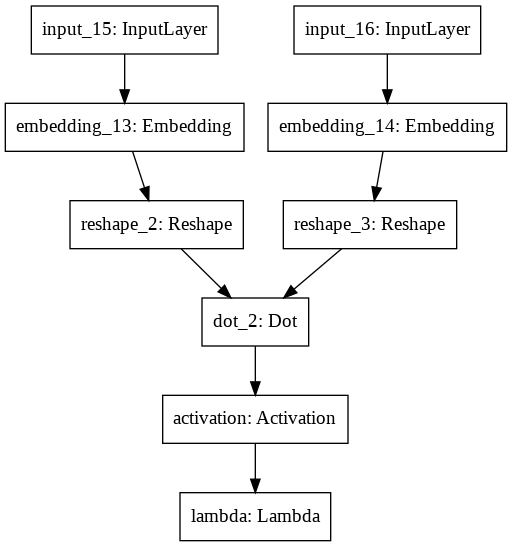

In [ ]:
# Number of latent factors
emb_sz = 50

# User embeddings
user = layers.Input(shape=(1,))
user_emb = layers.Embedding(n_users, emb_sz, embeddings_regularizer=regularizers.l2(1e-6))(user)
user_emb = layers.Reshape((emb_sz,))(user_emb)

# Movie embeddings
movie = layers.Input(shape=(1,))
movie_emb = layers.Embedding(n_movies, emb_sz, embeddings_regularizer=regularizers.l2(1e-6))(movie)
movie_emb = layers.Reshape((emb_sz,))(movie_emb)

# Dot product
rating = layers.Dot(axes=1)([user_emb, movie_emb])
rating = layers.Activation('sigmoid')(rating)
rating = layers.Lambda(lambda x:x*(max_rating - min_rating) + min_rating)(rating)

# Model
model = models.Model([user, movie], rating)

# Compile the model
model.compile(loss='mse', metrics=metrics.RootMeanSquaredError(),
              optimizer=optimizers.Adam(lr=0.001))

# Show model summary
model.summary()
plot_model(model)

Not part of the answer

In [ ]:
model.fit(x=[X_train[:,0], X_train[:,1]], y=y_train,
          batch_size=64, epochs=5, verbose=1,
          validation_data=([X_test[:,0], X_test[:,1]], y_test))

Epoch 1/5


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


1418/1418 [==============================] - 5s 3ms/step - loss: 1.4039 - root_mean_squared_error: 1.1846 - val_loss: 0.9433 - val_root_mean_squared_error: 0.9704
Epoch 2/5
1418/1418 [==============================] - 5s 3ms/step - loss: 0.7723 - root_mean_squared_error: 0.8773 - val_loss: 0.8003 - val_root_mean_squared_error: 0.8927
Epoch 3/5
1418/1418 [==============================] - 5s 3ms/step - loss: 0.5954 - root_mean_squared_error: 0.7689 - val_loss: 0.7749 - val_root_mean_squared_error: 0.8774
Epoch 4/5
1418/1418 [==============================] - 5s 3ms/step - loss: 0.4743 - root_mean_squared_error: 0.6845 - val_loss: 0.7739 - val_root_mean_squared_error: 0.8761
Epoch 5/5
1418/1418 [==============================] - 6s 4ms/step - loss: 0.3797 - root_mean_squared_error: 0.6105 - val_loss: 0.7837 - val_root_mean_squared_error: 0.8808


## Lesson 2: Adding user and movie biases

## Learning Objectives

- Learner will be able to incorporate users and movies priors (biases) in the model.
- Learner will be able to incorporate extra meta data as information to the model.

## Excercise

Build the model that accounts for movie and user bias

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_id (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
movie_id (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 50)        30500       user_id[0][0]                    
__________________________________________________________________________________________________
movie_embedding (Embedding)     (None, 1, 50)        486200      movie_id[0][0]                   
____________________________________________________________________________________________

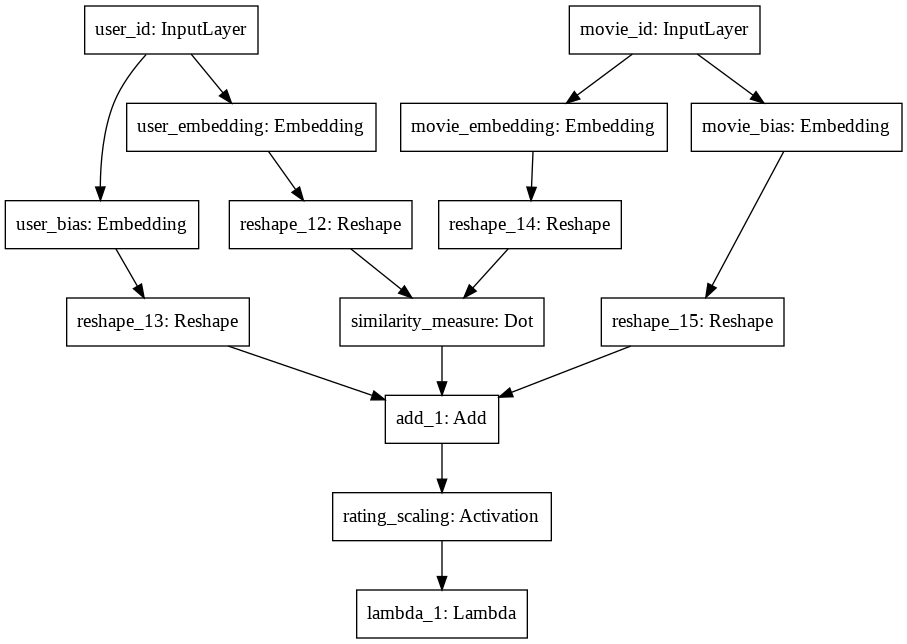

In [ ]:
# Number of latent factors
emb_sz = 50

# User embeddings
user = layers.Input(shape=(1),name='user_id')
user_emb = layers.Embedding(n_users, emb_sz, embeddings_regularizer=regularizers.l2(1e-6),name='user_embedding')(user)
user_emb = layers.Reshape((emb_sz,))(user_emb)

# User bias
user_bias = layers.Embedding(n_users, 1, embeddings_regularizer=regularizers.l2(1e-6),name='user_bias')(user)
user_bias = layers.Reshape((1,))(user_bias)

# Movie embeddings
movie = layers.Input(shape=(1,),name='movie_id')
movie_emb = layers.Embedding(n_movies, emb_sz, embeddings_regularizer=regularizers.l2(1e-6),name='movie_embedding')(movie)
movie_emb = layers.Reshape((emb_sz,))(movie_emb)

# Movie bias
movie_bias = layers.Embedding(n_movies, 1, embeddings_regularizer=regularizers.l2(1e-6),name='movie_bias')(movie)
movie_bias = layers.Reshape((1,))(movie_bias)

# Dot product
rating = layers.Dot(axes=1,name='similarity_measure')([user_emb, movie_emb])

# Add biases
rating = layers.Add()([rating, user_bias, movie_bias])
rating = layers.Activation('sigmoid',name='rating_scaling')(rating)
rating = layers.Lambda(lambda x:x*(max_rating - min_rating) + min_rating)(rating)

# Model
model = models.Model([user, movie], rating)

# Compile the model
model.compile(loss='mse', metrics=metrics.RootMeanSquaredError(),
              optimizer=optimizers.Adam(lr=0.001))

# Show model summary
print(model.summary())
plot_model(model, to_file='model.png')

In [ ]:
model.fit(x=[X_train[:,0], X_train[:,1]], y=y_train,
          batch_size=64, epochs=5, verbose=1,
          validation_data=([X_test[:,0], X_test[:,1]], y_test))

Epoch 1/5


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


1418/1418 [==============================] - 5s 3ms/step - loss: 1.2040 - root_mean_squared_error: 1.0970 - val_loss: 0.8552 - val_root_mean_squared_error: 0.9240
Epoch 2/5
1418/1418 [==============================] - 5s 3ms/step - loss: 0.7081 - root_mean_squared_error: 0.8402 - val_loss: 0.7499 - val_root_mean_squared_error: 0.8642
Epoch 3/5
1418/1418 [==============================] - 5s 3ms/step - loss: 0.5480 - root_mean_squared_error: 0.7378 - val_loss: 0.7285 - val_root_mean_squared_error: 0.8507
Epoch 4/5
1418/1418 [==============================] - 5s 3ms/step - loss: 0.4219 - root_mean_squared_error: 0.6456 - val_loss: 0.7321 - val_root_mean_squared_error: 0.8519
Epoch 5/5
1418/1418 [==============================] - 5s 3ms/step - loss: 0.3254 - root_mean_squared_error: 0.5648 - val_loss: 0.7450 - val_root_mean_squared_error: 0.8587


## Lesson 3: Going deeper
- Learner will be able to use Dense layers to build deeper models.


## Excercise

Build a deeper model by adding Dense layer before the output

## Answer

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_20 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_19 (Embedding)        (None, 1, 50)        30500       input_19[0][0]                   
__________________________________________________________________________________________________
embedding_21 (Embedding)        (None, 1, 50)        486200      input_20[0][0]                   
____________________________________________________________________________________________

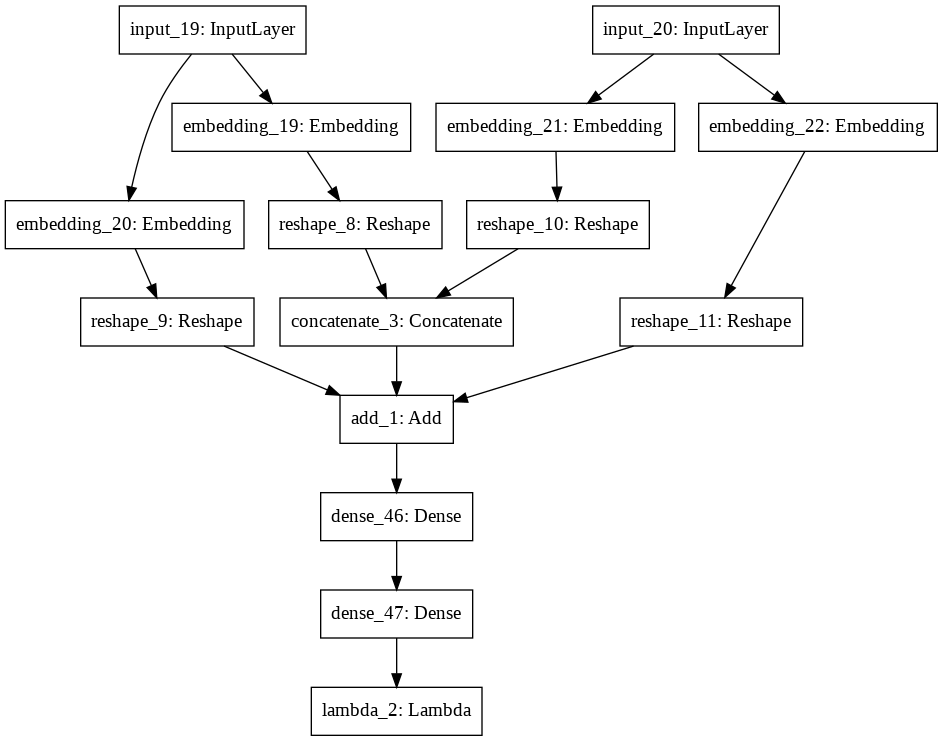

In [ ]:
# Number of latent factors
emb_sz = 50

# User embeddings
user = layers.Input(shape=(1,))
user_emb = layers.Embedding(n_users, emb_sz)(user)
user_emb = layers.Reshape((emb_sz,))(user_emb)

# User bias
user_bias = layers.Embedding(n_users, 1)(user)
user_bias = layers.Reshape((1,))(user_bias)

# Movie embeddings
movie = layers.Input(shape=(1,))
movie_emb = layers.Embedding(n_movies, emb_sz)(movie)
movie_emb = layers.Reshape((emb_sz,))(movie_emb)

# Movie bias
movie_bias = layers.Embedding(n_movies, 1)(movie)
movie_bias = layers.Reshape((1,))(movie_bias)

# Dot product
rating = layers.Concatenate()([user_emb, movie_emb])

# Add biases
rating = layers.Add()([rating, user_bias, movie_bias])
rating = layers.Dense(10, activation='relu')(rating)
rating = layers.Dense(1, activation='sigmoid')(rating)
rating = layers.Lambda(lambda x:x*(max_rating - min_rating) + min_rating)(rating)

# Model
model = models.Model([user, movie], rating)

# Compile the model
model.compile(loss='mse',  metrics=metrics.RootMeanSquaredError(),
              optimizer=optimizers.Adam(lr=0.001))

# Show model summary
print(model.summary())
plot_model(model, to_file='model.png')

In [ ]:
model.fit(x=[X_train[:,0], X_train[:,1]], y=y_train,
          batch_size=64, epochs=5, verbose=1,
          validation_data=([X_test[:,0], X_test[:,1]], y_test))

Epoch 1/5
1418/1418 [==============================] - 6s 4ms/step - loss: 0.8406 - root_mean_squared_error: 0.9168 - val_loss: 0.7791 - val_root_mean_squared_error: 0.8827
Epoch 2/5
1418/1418 [==============================] - 6s 4ms/step - loss: 0.6862 - root_mean_squared_error: 0.8284 - val_loss: 0.7653 - val_root_mean_squared_error: 0.8749
Epoch 3/5
1418/1418 [==============================] - 6s 4ms/step - loss: 0.6388 - root_mean_squared_error: 0.7992 - val_loss: 0.7747 - val_root_mean_squared_error: 0.8803
Epoch 4/5
1418/1418 [==============================] - 6s 4ms/step - loss: 0.6051 - root_mean_squared_error: 0.7779 - val_loss: 0.7803 - val_root_mean_squared_error: 0.8835
Epoch 5/5
1418/1418 [==============================] - 6s 4ms/step - loss: 0.5771 - root_mean_squared_error: 0.7597 - val_loss: 0.7858 - val_root_mean_squared_error: 0.8866


## Lesson 4: Use regularization to help model generalization


## Learning Objectives
- Learner will be able to incorporate Embedding regualization to help recommender system generalization.
- Learner will be able to incorporate Dropout to help recommender system generalization.

## Excercise

Add Embedding regularization

## Answer

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_22 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_23 (Embedding)        (None, 1, 50)        30500       input_21[0][0]                   
__________________________________________________________________________________________________
embedding_25 (Embedding)        (None, 1, 50)        486200      input_22[0][0]                   
___________________________________________________________________________________________

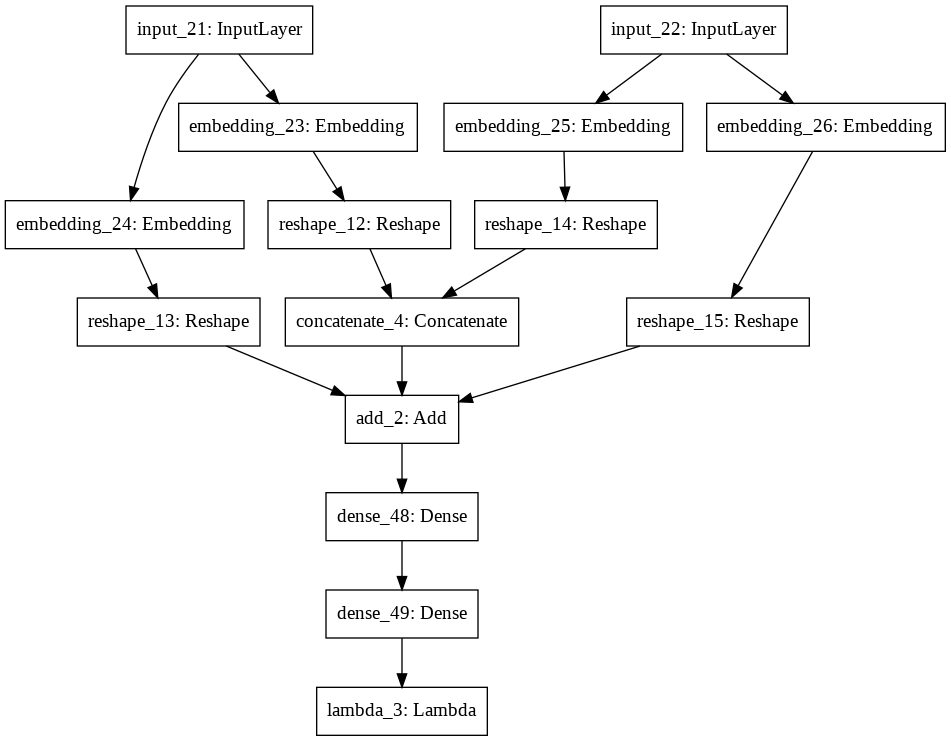

In [ ]:
# Number of latent factors
emb_sz = 50

# User embeddings
user = layers.Input(shape=(1,))
user_emb = layers.Embedding(n_users, emb_sz, embeddings_regularizer=regularizers.l2(1e-6))(user)
user_emb = layers.Reshape((emb_sz,))(user_emb)

# User bias
user_bias = layers.Embedding(n_users, 1, embeddings_regularizer=regularizers.l2(1e-6))(user)
user_bias = layers.Reshape((1,))(user_bias)

# Movie embeddings
movie = layers.Input(shape=(1,))
movie_emb = layers.Embedding(n_movies, emb_sz, embeddings_regularizer=regularizers.l2(1e-6))(movie)
movie_emb = layers.Reshape((emb_sz,))(movie_emb)

# Movie bias
movie_bias = layers.Embedding(n_movies, 1, embeddings_regularizer=regularizers.l2(1e-6))(movie)
movie_bias = layers.Reshape((1,))(movie_bias)

# Dot product
rating = layers.Concatenate()([user_emb, movie_emb])

# Add biases
rating = layers.Add()([rating, user_bias, movie_bias])
rating = layers.Dense(10, activation='relu')(rating)
rating = layers.Dense(1, activation='sigmoid')(rating)
rating = layers.Lambda(lambda x:x*(max_rating - min_rating) + min_rating)(rating)

# Model
model = models.Model([user, movie], rating)

# Compile the model
model.compile(loss='mse',  metrics=metrics.RootMeanSquaredError(),
              optimizer=optimizers.Adam(lr=0.001))

# Show model summary
print(model.summary())
plot_model(model, to_file='model.png')

In [ ]:
model.fit(x=[X_train[:,0], X_train[:,1]], y=y_train,
          batch_size=64, epochs=5, verbose=1,
          validation_data=([X_test[:,0], X_test[:,1]], y_test))

Epoch 1/5


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


1418/1418 [==============================] - 5s 4ms/step - loss: 0.8321 - root_mean_squared_error: 0.9120 - val_loss: 0.7855 - val_root_mean_squared_error: 0.8860
Epoch 2/5
1418/1418 [==============================] - 5s 4ms/step - loss: 0.6844 - root_mean_squared_error: 0.8268 - val_loss: 0.7728 - val_root_mean_squared_error: 0.8785
Epoch 3/5
1418/1418 [==============================] - 6s 4ms/step - loss: 0.6352 - root_mean_squared_error: 0.7962 - val_loss: 0.7765 - val_root_mean_squared_error: 0.8805
Epoch 4/5
1418/1418 [==============================] - 7s 5ms/step - loss: 0.6029 - root_mean_squared_error: 0.7753 - val_loss: 0.7833 - val_root_mean_squared_error: 0.8840
Epoch 5/5
1418/1418 [==============================] - 5s 4ms/step - loss: 0.5768 - root_mean_squared_error: 0.7579 - val_loss: 0.7931 - val_root_mean_squared_error: 0.8893


## Excercise

Add Dropout layer to the model

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_24 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_27 (Embedding)        (None, 1, 50)        30500       input_23[0][0]                   
__________________________________________________________________________________________________
embedding_29 (Embedding)        (None, 1, 50)        486200      input_24[0][0]                   
___________________________________________________________________________________________

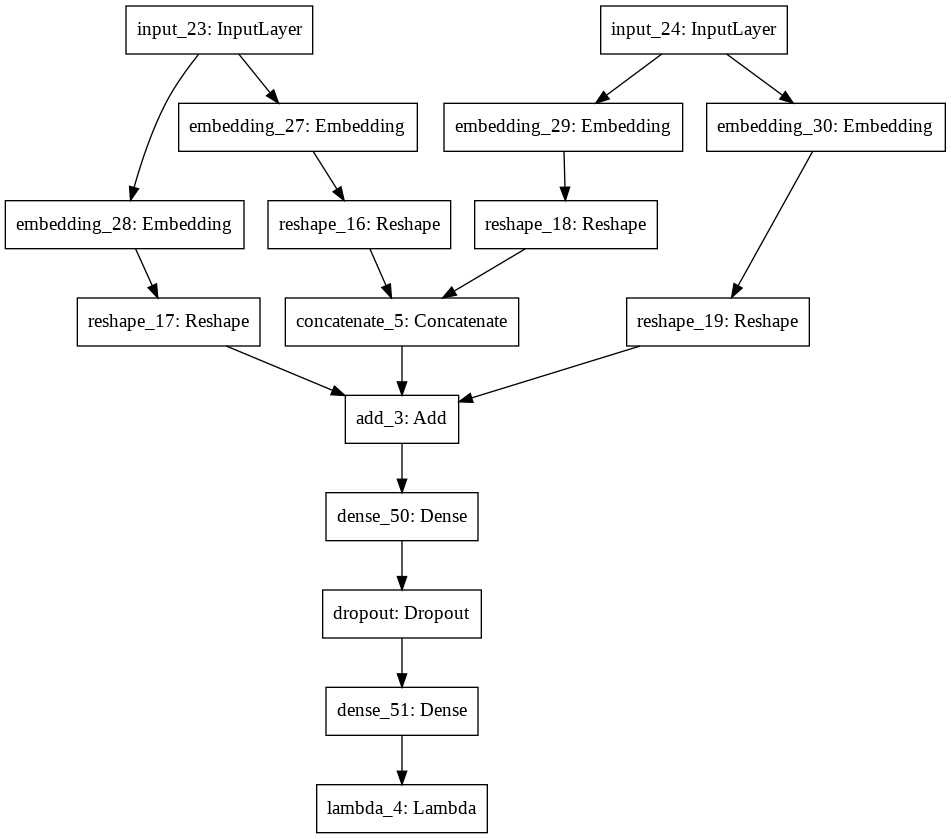

In [ ]:
# Number of latent factors
emb_sz = 50

# User embeddings
user = layers.Input(shape=(1,))
user_emb = layers.Embedding(n_users, emb_sz, embeddings_regularizer=regularizers.l2(1e-6))(user)
user_emb = layers.Reshape((emb_sz,))(user_emb)

# User bias
user_bias = layers.Embedding(n_users, 1, embeddings_regularizer=regularizers.l2(1e-6))(user)
user_bias = layers.Reshape((1,))(user_bias)

# Movie embeddings
movie = layers.Input(shape=(1,))
movie_emb = layers.Embedding(n_movies, emb_sz, embeddings_regularizer=regularizers.l2(1e-6))(movie)
movie_emb = layers.Reshape((emb_sz,))(movie_emb)

# Movie bias
movie_bias = layers.Embedding(n_movies, 1, embeddings_regularizer=regularizers.l2(1e-6))(movie)
movie_bias = layers.Reshape((1,))(movie_bias)

# Dot product
rating = layers.Concatenate()([user_emb, movie_emb])

# Add biases
rating = layers.Add()([rating, user_bias, movie_bias])
rating = layers.Dense(10, activation='relu')(rating)
rating = layers.Dropout(0.5)(rating)
rating = layers.Dense(1, activation='sigmoid')(rating)
rating = layers.Lambda(lambda x:x*(max_rating - min_rating) + min_rating)(rating)

# Model
model = models.Model([user, movie], rating)

# Compile the model
model.compile(loss='mse',  metrics=metrics.RootMeanSquaredError(),
              optimizer=optimizers.Adam(lr=0.001))

# Show model summary
print(model.summary())
plot_model(model, to_file='model.png')

## Answer

In [ ]:
model.fit(x=[X_train[:,0], X_train[:,1]], y=y_train,
          batch_size=64, epochs=5, verbose=1,
          validation_data=([X_test[:,0], X_test[:,1]], y_test))

Epoch 1/5


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


1418/1418 [==============================] - 5s 4ms/step - loss: 0.9589 - root_mean_squared_error: 0.9791 - val_loss: 0.7942 - val_root_mean_squared_error: 0.8908
Epoch 2/5
1418/1418 [==============================] - 5s 4ms/step - loss: 0.7692 - root_mean_squared_error: 0.8766 - val_loss: 0.7777 - val_root_mean_squared_error: 0.8813
Epoch 3/5
1418/1418 [==============================] - 5s 4ms/step - loss: 0.7311 - root_mean_squared_error: 0.8543 - val_loss: 0.7740 - val_root_mean_squared_error: 0.8791
Epoch 4/5
1418/1418 [==============================] - 5s 4ms/step - loss: 0.7090 - root_mean_squared_error: 0.8410 - val_loss: 0.7803 - val_root_mean_squared_error: 0.8824
Epoch 5/5
1418/1418 [==============================] - 5s 4ms/step - loss: 0.6982 - root_mean_squared_error: 0.8344 - val_loss: 0.7832 - val_root_mean_squared_error: 0.8838


# References
- https://developers.google.com/machine-learning/recommendation/overview
- https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
- https://www.youtube.com/watch?v=gbceqO8PpBg&t=6893s
- https://www.youtube.com/watch?v=qvRL74L81lg&t=1179s
- https://github.com/jalajthanaki/Movie_recommendation_engine
- https://www.datacamp.com/community/tutorials/recommender-systems-python?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034364&utm_targetid=aud-763347114660:dsa-473406569915&utm_loc_interest_ms=&utm_loc_physical_ms=9073656&gclid=Cj0KCQjws_r0BRCwARIsAMxfDRiqkUn4KsOkpT75T3HPhw8A68G6b36t0kpe0XFFLUt_QGcvVPV_u1saAkfMEALw_wcB